In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [25]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [26]:
df['custcat'].value_counts()

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

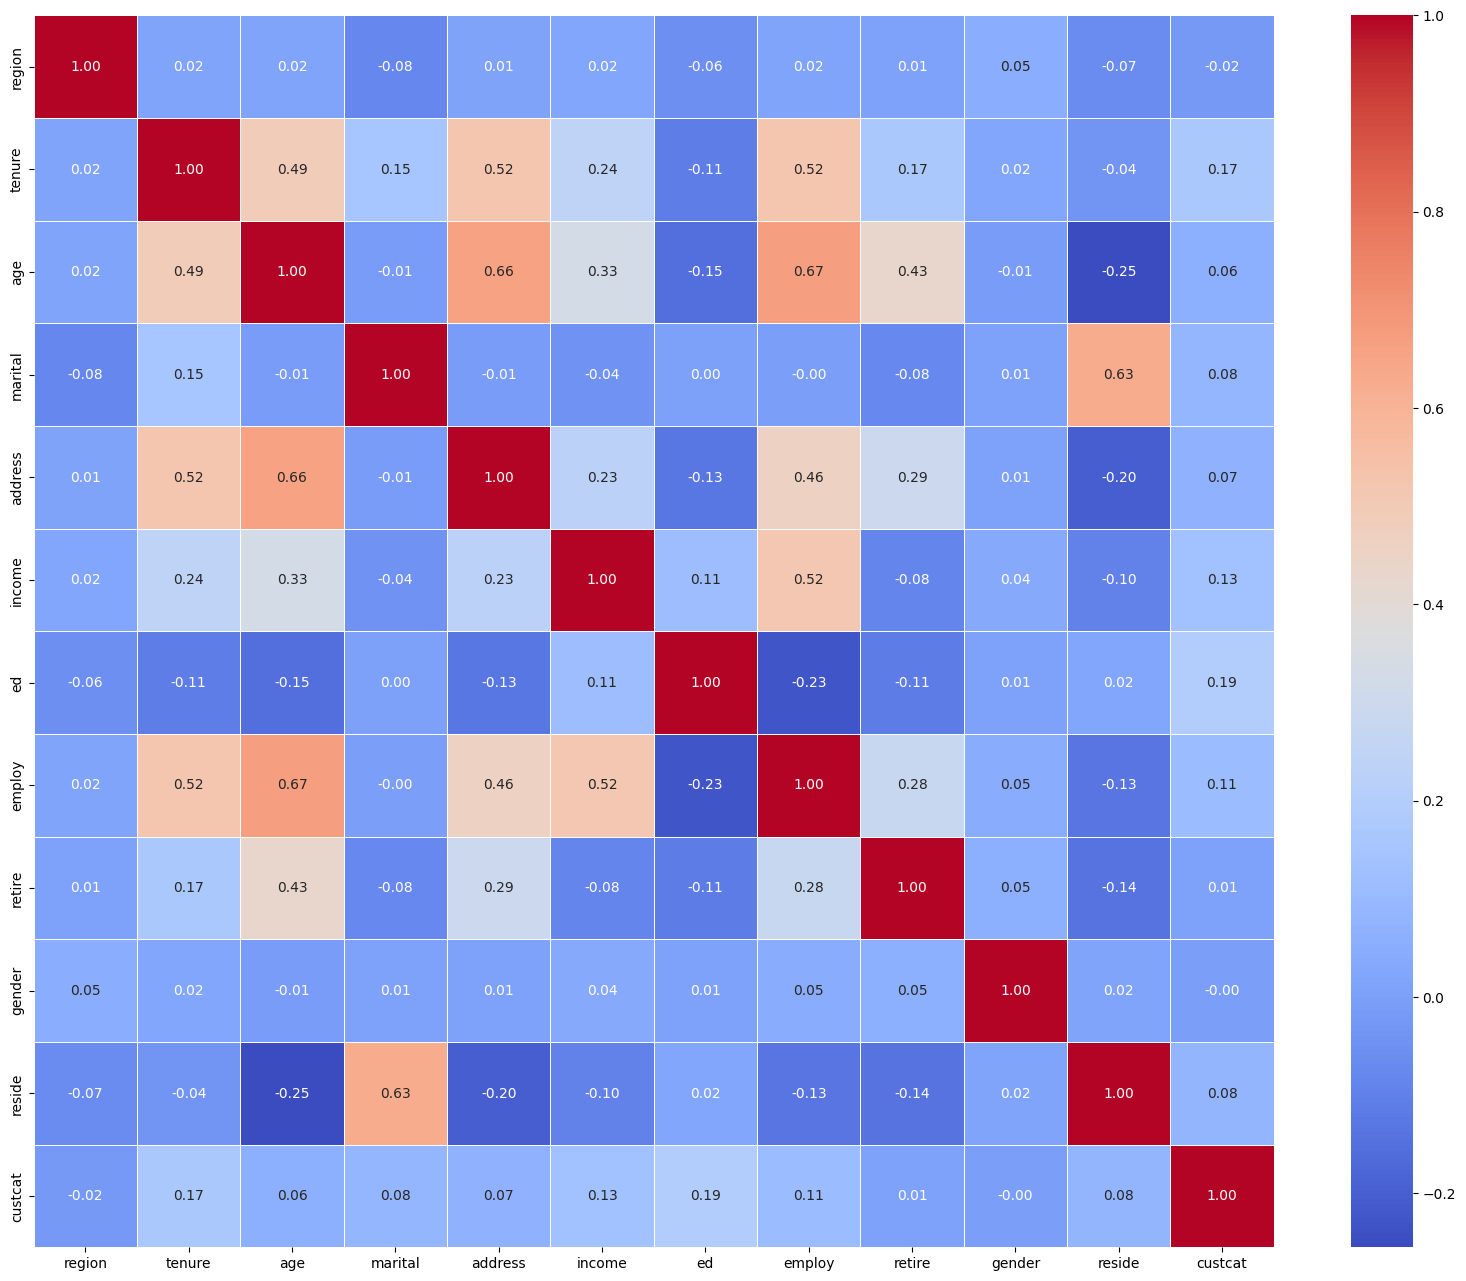

In [27]:
correletion_matrix = df.corr()
plt.figure(figsize=(20 , 16))
sns.heatmap(correletion_matrix , annot=True , cmap='coolwarm' , fmt = '.2f' , linewidths=0.5)
plt.show()

In [28]:
correletion_vlues = abs(df.corr()['custcat'].drop('custcat'))
correletion_vlues

region     0.023771
tenure     0.166691
age        0.056909
marital    0.083836
address    0.067913
income     0.134525
ed         0.193864
employ     0.110011
retire     0.008908
gender     0.004966
reside     0.082022
Name: custcat, dtype: float64

In [29]:
X = df.drop(['custcat'], axis=1)
X_norm = StandardScaler().fit_transform(X)
y = df['custcat']

In [30]:
X_train , X_test , y_train , y_test = train_test_split(X_norm , y , test_size=0.2 , random_state=4)

In [34]:
accuracies = []
for k in range(1, 10):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_model = knn_classifier.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"Accuracy for {k} is {acc}")

Accuracy for 1 is 0.3
Accuracy for 2 is 0.29
Accuracy for 3 is 0.315
Accuracy for 4 is 0.32
Accuracy for 5 is 0.315
Accuracy for 6 is 0.31
Accuracy for 7 is 0.335
Accuracy for 8 is 0.325
Accuracy for 9 is 0.34


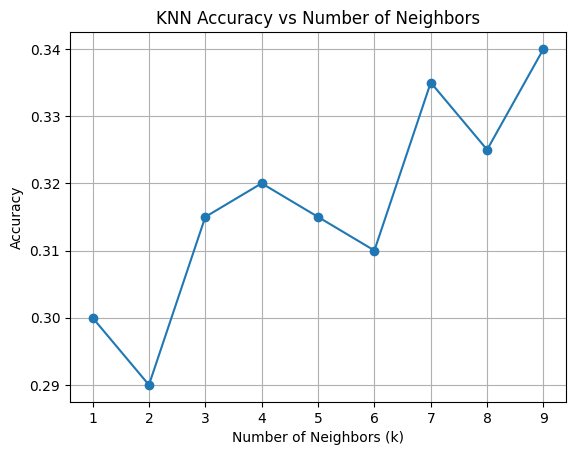

In [35]:
plt.plot(range(1, 10), accuracies, marker='o')
plt.title("KNN Accuracy vs Number of Neighbors")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.xticks(range(1, 10))
plt.grid(True)
plt.show()